[[23 30]
 [23 24]]


<ipython-input-4-d9f8a71d612a>:59: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


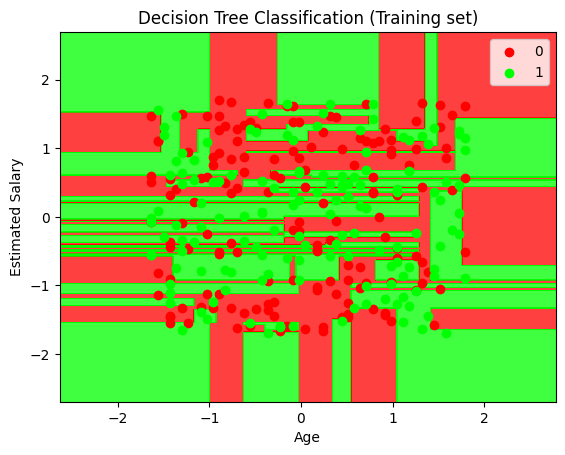

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the dataset (since you don't have the file)
# Generate random data for age and estimated salary (just for illustration)
np.random.seed(0)
age = np.random.randint(18, 70, 400)  # Random ages between 18 and 70
salary = np.random.randint(10000, 120000, 400)  # Random salaries between 10k and 120k
purchased = np.random.choice([0, 1], 400)  # Randomly assign 0 (No purchase) or 1 (Purchase)

# Create the DataFrame
dataset = pd.DataFrame({'Age': age, 'EstimatedSalary': salary, 'Purchased': purchased})

# Split the dataset into features and target
X = dataset.iloc[:, [0, 1]].values  # Age and Estimated Salary
y = dataset.iloc[:, 2].values  # Purchased (0 or 1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizing the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Correct the ListedColormap with RGB tuples
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap([(1, 0, 0), (0, 1, 0)]))  # RGB tuples for red and green
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for training data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap([(1, 0, 0), (0, 1, 0)])(i), label=j)  # RGB tuples for red and green

plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
